## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [60]:
from cProfile import label

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [61]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [62]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [63]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [64]:
rocs = []
prcs = []

## Add code for cross-validation here
for train_index, test_index in skf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    model = LogisticRegression(solver='saga', max_iter = 10000)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    rocs.append(roc_auc_score(y_test, y_hat))
    prcs.append(average_precision_score(y_test, y_hat))
    
## Report AUROC and average precision here
print(f'Average AUROC = {sum(rocs)/len(rocs)}')
print(f'Average Precision = {sum(prcs)/len(prcs)}')

Average AUROC = 0.5933333333333334
Average Precision = 0.7917018117018118


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [65]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here
for i, c in enumerate(cc):
    fold = 0
    for train_index, test_index in skf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model = LogisticRegression(solver='saga', max_iter = 10000, C = c, penalty='l2')
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        rocs[i][fold] = roc_auc_score(y_test, y_hat)
        prcs[i][fold] = average_precision_score(y_test, y_hat)
        fold += 1


In [66]:
## Compute the average auroc and average average precision for each value of cc
avg_auroc = list(sum(rocs[i])/len(rocs[i]) for i in range(rocs.shape[0]))
avg_prec = list(sum(prcs[i])/len(prcs[i]) for i in range(prcs.shape[0]))

print(f'Average AUROC for Each Value of cc: {avg_auroc}')
print(f'Average Precision for Each Value of cc: {avg_prec}')
## Report the highest values of the average auroc and average average precision here
print(f'Highest Average AUROC is {max(avg_auroc)}')
print(f'Highest Average Precision is {max(avg_prec)}')

Average AUROC for Each Value of cc: [0.5, 0.52, 0.5822222222222222, 0.5933333333333334, 0.5933333333333334, 0.6033333333333333, 0.6033333333333333, 0.6033333333333333]
Average Precision for Each Value of cc: [0.7538461538461538, 0.7616734143049932, 0.7871973071973073, 0.7917018117018118, 0.7917018117018118, 0.7965757612816436, 0.7965757612816436, 0.7965757612816436]
Highest Average AUROC is 0.6033333333333333
Highest Average Precision is 0.7965757612816436


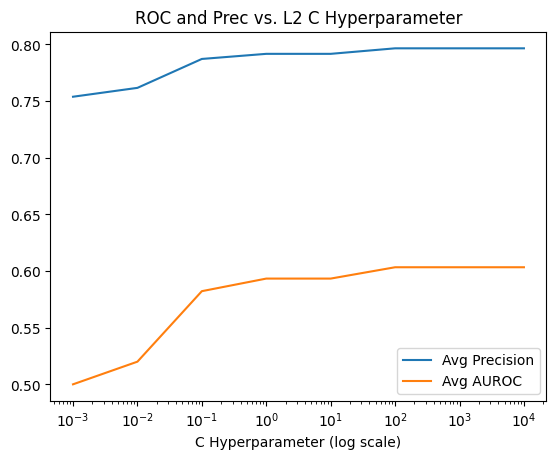

In [67]:
## Create the plot here
plt.figure()
plt.semilogx(cc, avg_prec, label = 'Avg Precision')
plt.semilogx(cc, avg_auroc, label = 'Avg AUROC')
plt.xlabel('C Hyperparameter (log scale)')
plt.title('ROC and Prec vs. L2 C Hyperparameter')
plt.legend()